In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib
import matplotlib.pyplot as pp
from IPython import display
from IPython.display import Image
from ipywidgets import interact, widgets
%matplotlib inline

In [2]:
datos = pd.read_csv('Datos/gapminder/gapminder.xls')

In [3]:
datos.head(2)

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Data columns (total 9 columns):
country             14740 non-null object
year                14740 non-null int64
region              14740 non-null object
population          14740 non-null float64
life_expectancy     14740 non-null float64
age5_surviving      14740 non-null float64
babies_per_woman    14740 non-null float64
gdp_per_capita      14740 non-null float64
gdp_per_day         14740 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 921.3+ KB


In [5]:
datos.loc[0:200:50]

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.00,603.0,1.650924
50,Afghanistan,1985,Asia,11630498.0,45.21,78.400,7.68,1384.0,3.789185
100,Albania,1954,Europe,1382881.0,56.59,84.829,6.31,2108.0,5.771389
150,Albania,2004,Europe,3103758.0,75.90,97.850,2.00,6672.0,18.266940
200,Algeria,1973,Africa,15804428.0,53.91,77.660,7.55,7581.0,20.755647


In [6]:
datosDos = datos.dropna()

In [7]:
datosDos.reset_index(drop=True, inplace=True)

In [8]:
datosDos.dtypes

country              object
year                  int64
region               object
population          float64
life_expectancy     float64
age5_surviving      float64
babies_per_woman    float64
gdp_per_capita      float64
gdp_per_day         float64
dtype: object

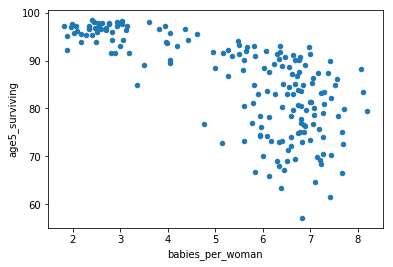

In [9]:
datosDos[datosDos.year == 1965].plot.scatter('babies_per_woman','age5_surviving')

In [10]:
def plotyearDinamico(anio):
    Continentes = {'Africa': 'skyblue', 'Europe' : 'gold', 'America' : 'palegreen', 'Asia' : 'coral'}
    data = datosDos[datosDos.year == anio]
    area = 10e-6 * datosDos.population
    color = data.region.map({'Africa': 'skyblue', 'Europe' : 'gold', 'America' : 'palegreen', 'Asia' : 'coral'})
    
    data.plot.scatter('babies_per_woman', 'age5_surviving', s = area, c = color, linewidth = 1, edgecolors = 'k',
                     figsize=(9,6), alpha=0.8)
    
    pp.axis(ymin = 50, ymax = 105, xmin = 0, xmax = 8)
    pp.xlabel('babies_per_woman')
    pp.ylabel('age5_surviving')
    
    pp.grid(True)
    

In [11]:
interact(plotyearDinamico, anio=widgets.IntSlider(min=1950, max=2015, step=1, value= 1950))

interactive(children=(IntSlider(value=1950, description='anio', max=2015, min=1950), Output()), _dom_classes=(…

<function __main__.plotyearDinamico(anio)>

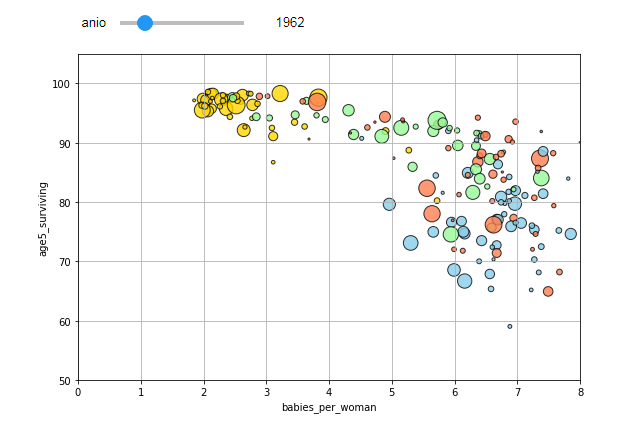

In [12]:
### Se ve de esta forma pero github no lo muestra, es un grafico en el que se puede ir 
### cambiano el año y va mostrando la transición

Image(filename= 'Datos/gapminder/gaminder.png', width=700, height=700)

In [13]:
italy = datos.query('country == "Italy"')
india = datos.query('country == "India"')

In [14]:
italy.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
6397,Italy,1800,Europe,18822234.0,29.69,54.259,5.47,2225.0,6.091718
6398,Italy,1810,Europe,19491674.0,29.69,54.395,5.47,2371.0,6.491444
6399,Italy,1820,Europe,20341608.0,29.69,54.531,5.47,2474.0,6.773443
6400,Italy,1830,Europe,21529667.0,29.69,54.667,5.47,2471.0,6.765229
6401,Italy,1840,Europe,22956667.0,29.69,54.804,5.47,2524.0,6.910335


In [15]:
india.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
5911,India,1800,Asia,168574895.0,25.44,49.061,5.95,1052.0,2.880219
5912,India,1810,Asia,171940819.0,25.44,49.061,5.95,1051.0,2.877481
5913,India,1820,Asia,176225709.0,25.44,49.061,5.95,1050.0,2.874743
5914,India,1830,Asia,182214537.0,25.44,49.061,5.95,1052.0,2.880219
5915,India,1840,Asia,189298397.0,25.44,49.061,5.95,1053.0,2.882957


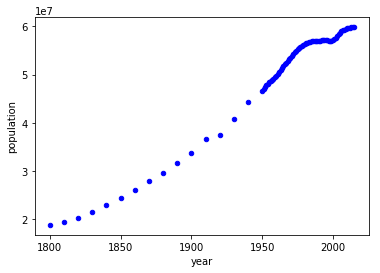

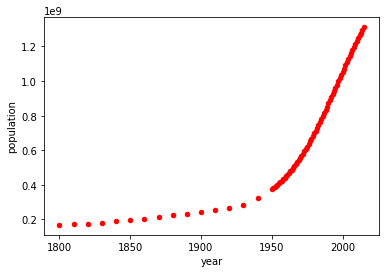

In [16]:
italy.plot.scatter("year", "population", color="blue")
india.plot.scatter("year", "population", color="red")

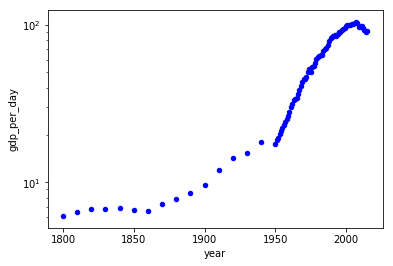

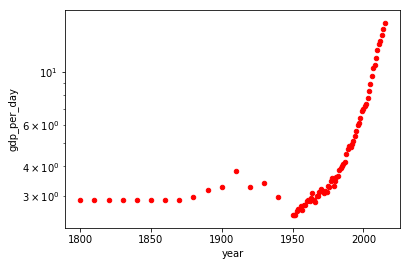

In [17]:
italy.plot.scatter("year", "gdp_per_day", logy=True, color="blue")
india.plot.scatter("year", "gdp_per_day", logy=True, color="red")

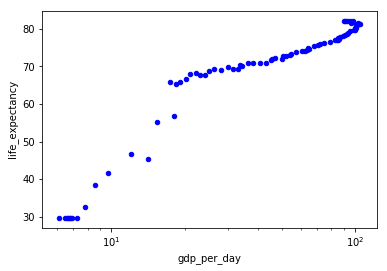

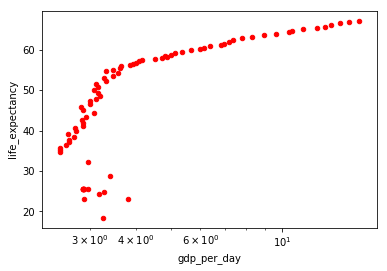

In [18]:
italy.plot.scatter("gdp_per_day", "life_expectancy", logx=True, color="blue")
india.plot.scatter("gdp_per_day", "life_expectancy", logx=True, color="red")

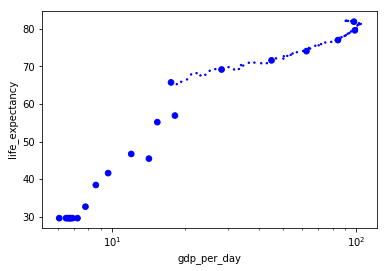

In [19]:
size = np.where(italy.year % 10 == 0,32, 2)
italy.plot.scatter("gdp_per_day", "life_expectancy", logx=True, color="blue", s= size)

In [20]:
data = datos.query('(country == "Italy") or(country == "United States")')

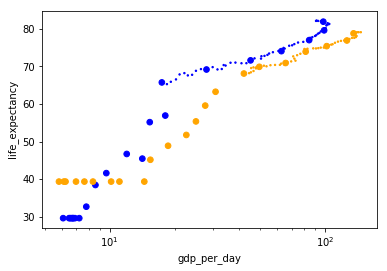

In [21]:
size = np.where(data.year % 10 == 0, 32, 2)
color = np.where(data.country== 'Italy', 'blue', 'orange' )
data.plot.scatter("gdp_per_day", "life_expectancy", logx=True, color=color, s= size)

In [22]:
dataDos = datos.query('(country == "China") or (country == "United States")')

<bound method FramePlotMethods.line of <pandas.plotting._core.FramePlotMethods object at 0x0E57BA50>>

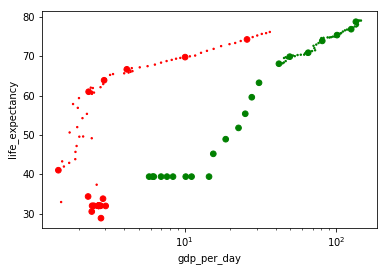

In [23]:
size = np.where(dataDos.year % 10 == 0, 32, 2)
color = np.where(dataDos.country== 'China', 'red', 'green' )
dataDos.plot.scatter("gdp_per_day", "life_expectancy", logx=True, color=color, s= size)
dataDos[dataDos.country == 'China'].plot.line
dataDos[dataDos.country == 'United States'].plot.line

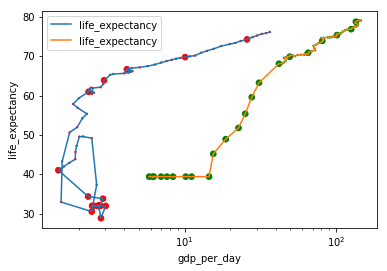

In [24]:
ax = dataDos.plot.scatter("gdp_per_day", "life_expectancy", logx=True, color=color, s= size)
dataDos[dataDos.country == 'China'].plot.line(x = "gdp_per_day", y = "life_expectancy", ax = ax)
dataDos[dataDos.country == 'United States'].plot.line(x = "gdp_per_day", y = "life_expectancy", ax = ax)